In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import geopandas as gdp

In [2]:
df = pd.read_csv('E://springboard//capstone_project_1//clean_data/clean_data.csv', encoding='ISO-8859-1', 
                  index_col=[0], dtype={'Zip':'category'})

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Simplify values in Weather column for plotting
df.loc[df['Weather'] == 'CLR', 'Weather'] = 'Sunny'
df.loc[df['Weather'] == 'CLD', 'Weather'] = 'Cloudy'
df.loc[(df['Weather'] != 'Sunny') & (df['Weather'] != 'Cloudy'), 'Weather'] = 'Bad'

In [4]:
# convert time to datetime format
df['Time'] = pd.to_datetime(df['Time'], format='%m/%d/%Y %H')
df['Year'] = df['Time'].dt.strftime('%Y')
df['Month'] = df['Time'].dt.strftime('%m')
df['Day'] = df['Time'].dt.strftime('%d')
df['Hour'] = df['Time'].dt.strftime('%H')
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Weekday'] = df['Time'].dt.weekday

In [6]:
# set Incident type as labels for plots
from textwrap import fill
labels = ['Fire', 'Overpressure Rupture, Explosion, Overheat(No Fire)', 'Rescue and Emergency Medical Service Incident',
         'Hazardous Condition(No Fire)', 'Service Call', 'Good Intent Call', 'False Alarm & False Call', 
         'Severe Weather & Natural Disaster', 'Special Incident Type']
labels = [fill(l, 20) for l in labels]

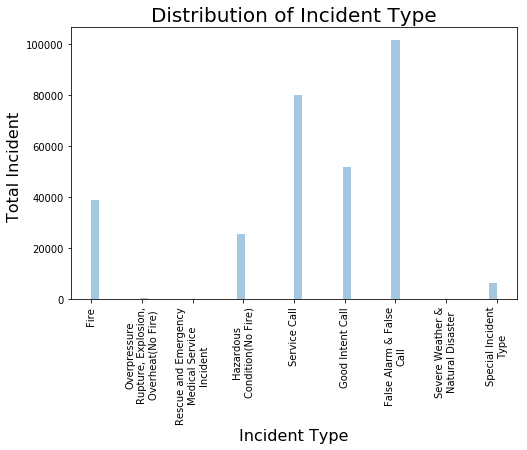

In [7]:
# plot Incident Type
plt.figure(figsize=(8,5))
sns.distplot(df['Incident Type'], hist=True, kde=False)
plt.title('Distribution of Incident Type', fontsize=20)
plt.xlabel('Incident Type', fontsize=16)
plt.ylabel('Total Incident ', fontsize=16)
plt.xticks(np.arange(1, 10), labels, rotation=90)
plt.show()

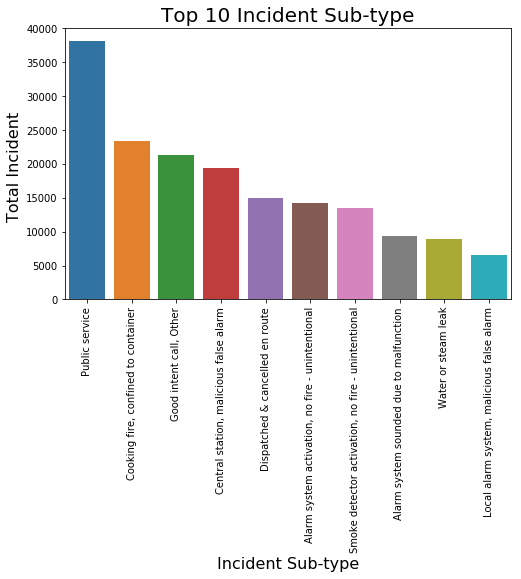

In [8]:
# plot Top 10 Incident Sub-type
df1 = df.groupby('Incident Description', as_index=False)['Incident Number'].count().\
      sort_values('Incident Number', ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x='Incident Description', y='Incident Number', data=df1)
plt.title('Top 10 Incident Sub-type', fontsize=20)
plt.xlabel('Incident Sub-type', fontsize=16)
plt.ylabel('Total Incident ', fontsize=16)
plt.xticks(rotation=90)
plt.show()

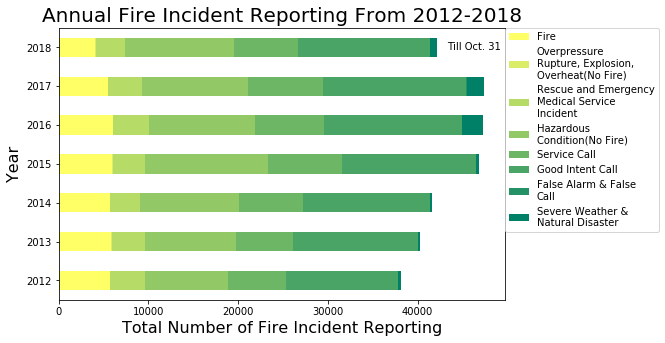

In [9]:
# plot Annual Incident Reporting in last 7 years
df1 = df.groupby(['Year', 'Incident Type'])['Incident Number'].count().unstack()
cmap = cm.get_cmap('summer_r')
df1.plot.barh(stacked=True, figsize=(8,5), cmap=cmap, edgecolor = "none")
plt.title('Annual Fire Incident Reporting From 2012-2018', fontsize=20)
plt.xlabel('Total Number of Fire Incident Reporting', fontsize=16)
plt.ylabel('Year', fontsize=16)
plt.figtext(.8, .82, "Till Oct. 31")
plt.legend(bbox_to_anchor=(1, 1), borderaxespad=0., labels=labels)
plt.show()

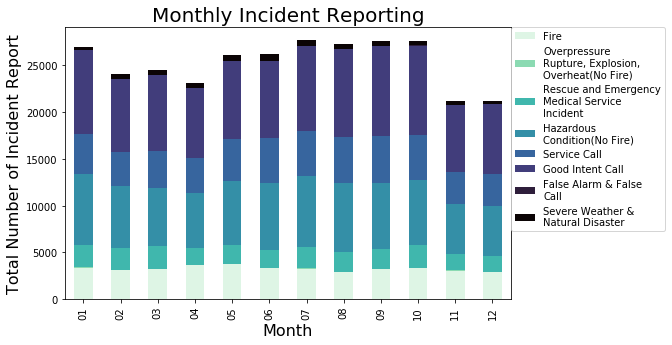

In [10]:
# plot monthly Incident Reporting
df1 = df.groupby(['Month', 'Incident Type']).agg({'Incident Number':'count'})
df1.unstack()['Incident Number'].plot(kind='bar', stacked=True, figsize=(8, 5), cmap='mako_r')
plt.title('Monthly Incident Reporting', fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Total Number of Incident Report', fontsize=16)
plt.legend(bbox_to_anchor=(1, 1), borderaxespad=0., labels=labels)
plt.show()

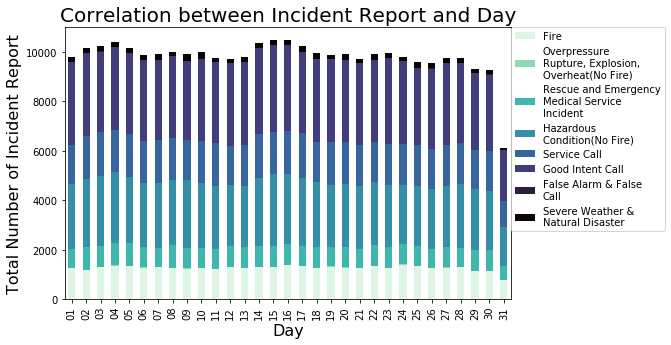

In [11]:
# plot daily Incident Reporting
df1 = df.groupby(['Day', 'Incident Type']).agg({'Incident Number':'count'})
df1.unstack()['Incident Number'].plot(kind='bar', stacked=True, figsize=(8, 5), cmap='mako_r')
plt.title('Correlation between Incident Report and Day', fontsize=20)
plt.xlabel('Day', fontsize=16)
plt.ylabel('Total Number of Incident Report', fontsize=16)
plt.legend(bbox_to_anchor=(1, 1), borderaxespad=0., labels=labels)
plt.show()

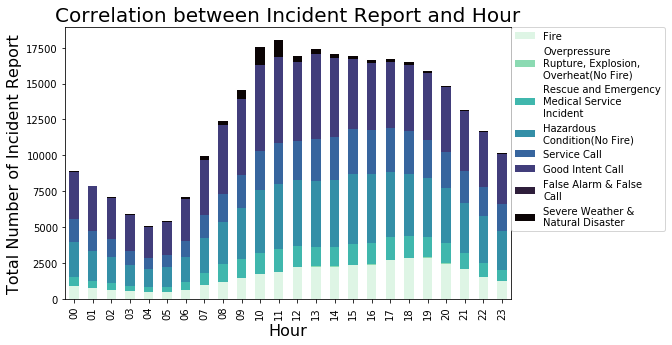

In [12]:
# report hourly Incident Reporting
df1 = df.groupby(['Hour', 'Incident Type']).agg({'Incident Number':'count'})
df1.unstack()['Incident Number'].plot(kind='bar', stacked=True, figsize=(8, 5), cmap='mako_r')
plt.title('Correlation between Incident Report and Hour', fontsize=20)
plt.xlabel('Hour', fontsize=16)
plt.ylabel('Total Number of Incident Report', fontsize=16)
plt.legend(bbox_to_anchor=(1, 1), borderaxespad=0., labels=labels)
plt.show()

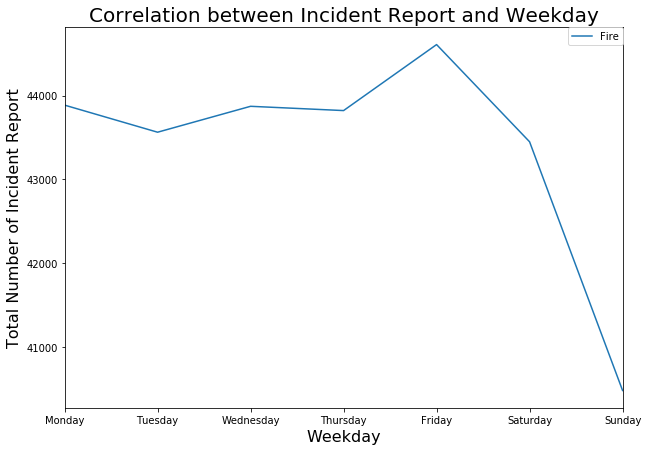

In [13]:
# plot weekday Incident Type
df1 =  df.groupby(['Weekday'], as_index=False)['Incident Number'].count()
df1.plot(x='Weekday', y='Incident Number', figsize=(10, 7))
plt.xticks(np.arange(7), order)
plt.title('Correlation between Incident Report and Weekday', fontsize=20)
plt.xlabel('Weekday', fontsize=16)
plt.ylabel('Total Number of Incident Report', fontsize=16)
plt.legend(bbox_to_anchor=(1, 1), borderaxespad=0., labels=labels)
plt.show()

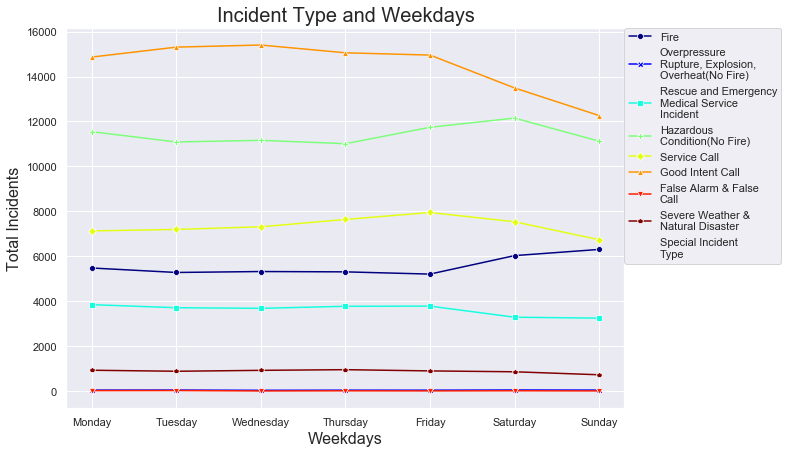

In [14]:
# plot Weekday Incident Type
df1 = df.groupby(['Weekday', 'Incident Type'], as_index=False)['Incident Number'].count()
sns.set(rc={'figure.figsize':(10,7)})
sns.lineplot(x='Weekday', y='Incident Number', hue='Incident Type', style='Incident Type', markers=True, 
              dashes=False, palette = 'jet', sizes = (100,50), data=df1)
plt.title('Incident Type and Weekdays', fontsize=20)
plt.xticks(np.arange(7), order)
plt.xlabel('Weekdays', fontsize=16)
plt.ylabel('Total Incidents', fontsize=16)
plt.legend(bbox_to_anchor=(1, 1), borderaxespad=0., labels=labels)
plt.show()

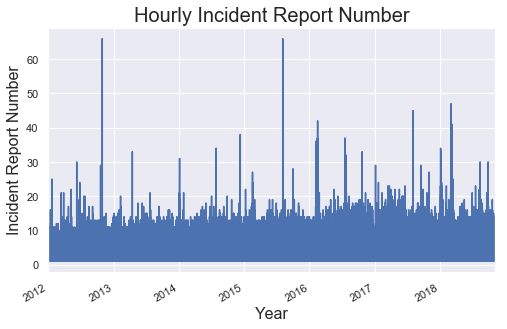

In [15]:
# plot the treand of Incident Reporting
df1 =df.groupby('Time')['Incident Type'].count()
df1.plot(figsize=(8, 5))
plt.title('Hourly Incident Report Number', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Incident Report Number', fontsize=16)
plt.show()

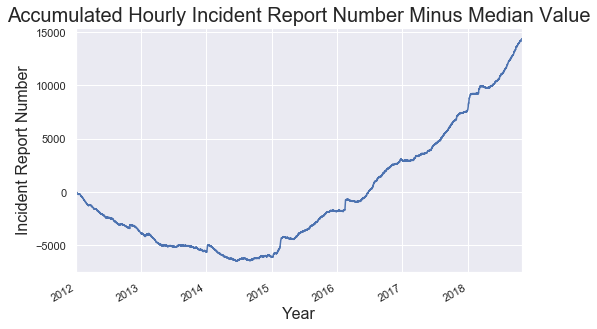

In [16]:
# plot accumulated hourly incident reporting
df1 =df.groupby('Time')['Incident Type'].count()
df1 = (df1-df1.median()).cumsum()
df1.plot(figsize=(8, 5))
plt.title('Accumulated Hourly Incident Report Number Minus Median Value', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Incident Report Number', fontsize=16)
plt.show()

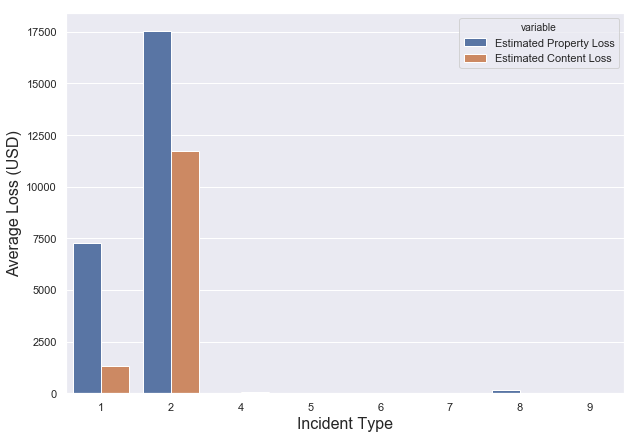

In [17]:
# Property loss and Incident Type
df1 = df.groupby('Incident Type', as_index=False).agg({'Estimated Property Loss':'mean',
                                                             'Estimated Content Loss':'mean'})
df1 = pd.melt(df1, id_vars='Incident Type')
sns.barplot(x='Incident Type', y='value', hue='variable', data=df1)
plt.xlabel('Incident Type', fontsize=16)
plt.ylabel('Average Loss (USD)', fontsize=16)
plt.show()

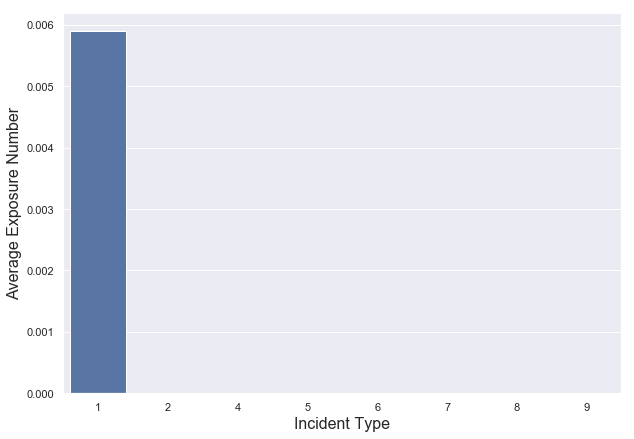

In [18]:
# Average exposure number relevant to Incident Type 
df1 = df.groupby('Incident Type', as_index=False)['Exposure Number'].mean()
sns.barplot(x='Incident Type', y='Exposure Number', data=df1)
plt.xlabel('Incident Type', fontsize=16)
plt.ylabel('Average Exposure Number', fontsize=16)
plt.show()

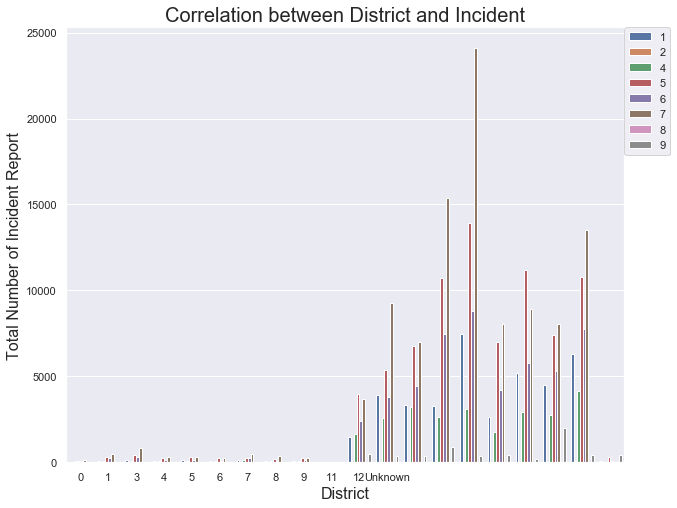

In [19]:
# district and Incident type
df1 = df.groupby(['District', 'Incident Type'], as_index=False)['Incident Number'].count()
order1 = ['0', '1', '3', '4', '5', '6', '7', '8', '9', '11', '12', 'Unknown']
plt.figure(figsize=(10,8))
sns.barplot(x='District', y='Incident Number', hue='Incident Type', data=df1)
plt.xticks(np.arange(12), order1)
plt.title('Correlation between District and Incident', fontsize=20)
plt.xlabel('District', fontsize=16)
plt.ylabel('Total Number of Incident Report', fontsize=16)
plt.legend(bbox_to_anchor=(1, 1), borderaxespad=0.)
plt.show()

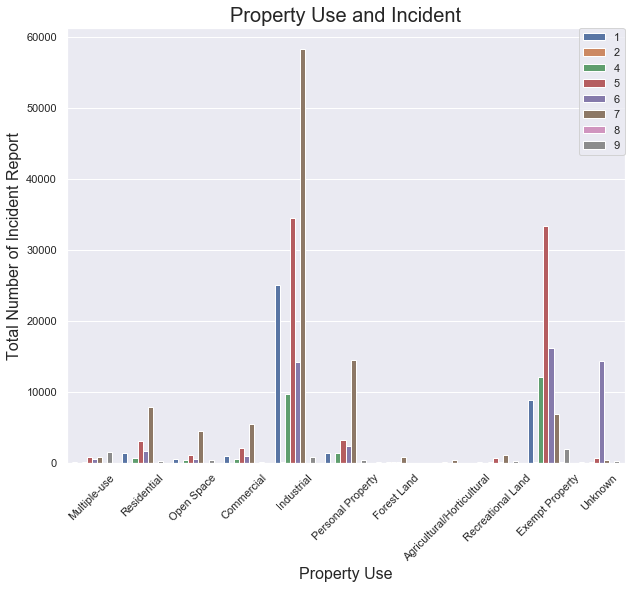

In [20]:
# property use and Incident Type
Pro_use = ['Multiple-use', 'Residential', 'Open Space', 'Commercial', 'Industrial', 'Personal Property', 
           'Forest Land', 'Agricultural/Horticultural', 'Recreational Land', 'Exempt Property', 'Unknown']
df1 = df.groupby(['Incident Type', 'Property Use'], as_index=False)['Incident Number'].count()
plt.figure(figsize=(10,8))
sns.barplot(x='Property Use', y='Incident Number', hue='Incident Type', data=df1)
plt.legend(bbox_to_anchor=(1, 1), borderaxespad=0.)
plt.title('Property Use and Incident', fontsize=20)
plt.xlabel('Property Use', fontsize=16)
plt.ylabel('Total Number of Incident Report', fontsize=16)
plt.xticks(np.arange(11), Pro_use, rotation=45)
plt.show()

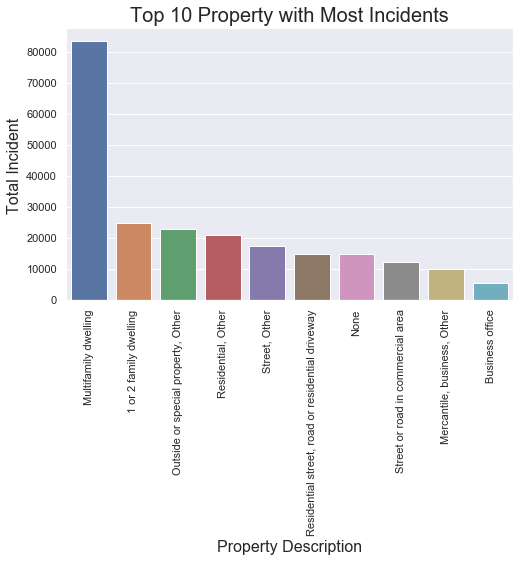

In [21]:
# Top 10 Property with most incidents
df1 = df.groupby('Property Description', as_index=False)['Incident Number'].count().\
      sort_values('Incident Number', ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x='Property Description', y='Incident Number', data=df1)
plt.title('Top 10 Property with Most Incidents', fontsize=20)
plt.xlabel('Property Description', fontsize=16)
plt.ylabel('Total Incident ', fontsize=16)
plt.xticks(rotation=90)
plt.show()

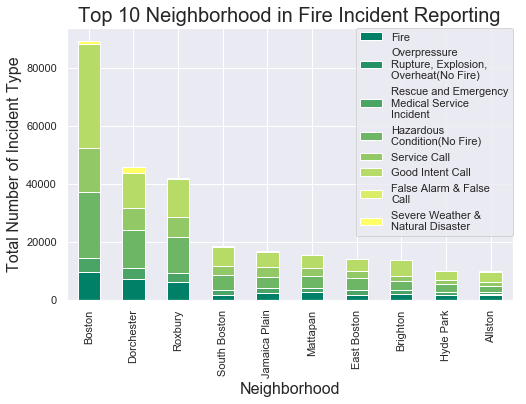

In [23]:
# Top 10 neirghborhood with most incident reporting
df1 = df[(df['Neighborhood'] != 'Unknown')]\
      .groupby(['Neighborhood', 'Incident Type']).agg({'Incident Number':'count'})
df1 = df1.unstack()['Incident Number']
df1['total'] = df1.sum(axis=1)
df1.sort_values(by='total', ascending=False).head(10).plot(y=[1, 2, 4, 5, 6, 7, 8, 9], kind='bar',figsize=(8,5), 
                                                                        cmap='summer', stacked=True)
plt.title('Top 10 Neighborhood in Fire Incident Reporting', fontsize=20)
plt.xlabel('Neighborhood', fontsize=16)
plt.ylabel('Total Number of Incident Type', fontsize=16)
plt.legend(bbox_to_anchor=(1, 1), borderaxespad=0., labels=labels)
plt.show()

In [24]:
# import Boston Neighborhood map
fb = 'E:/springboard/capstone_project_1/clean_data/bos_zip/ZIP_Codes.shp'
map_fb = gdp.read_file(fb)

df1 = df.groupby('Zip', as_index=False).agg({'Incident Type':'count', 'Population':'mean'})

merged = map_fb.set_index('ZIP5').join(df1.set_index('Zip')).fillna('0')
merged['Incident Type'] = merged['Incident Type'].astype(float)
merged['Population'] = merged['Population'].astype(float)

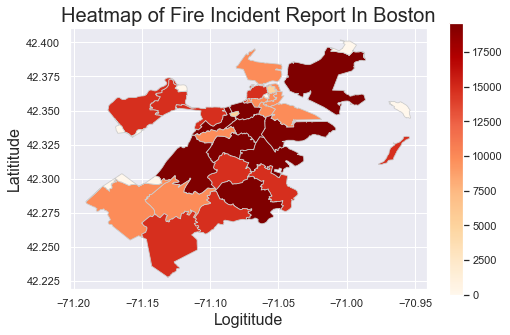

In [25]:
# plot heatmap of fire incident in Boston 
ax = merged.plot(column='Incident Type',  cmap='OrRd', linewidth=0.8, edgecolor='0.8',
                 scheme='quantiles', figsize=(8,5))
plt.title('Heatmap of Fire Incident Report In Boston', fontsize=20)
plt.xlabel('Logititude', fontsize=16)
plt.ylabel('Latititude', fontsize=16)

from matplotlib.colors import Normalize
from matplotlib import cm
norm = Normalize(vmin=merged['Incident Type'].min(), vmax=merged['Incident Type'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap='OrRd')
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
plt.show()

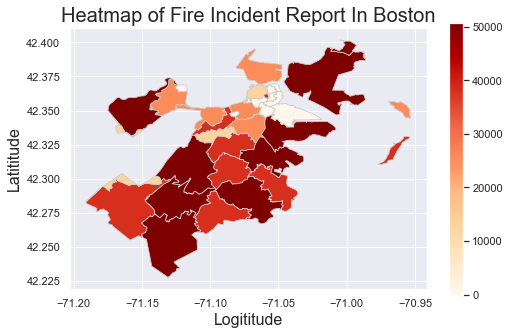

In [26]:
# plot population and Incident Type
ax1 = merged.plot(column='Population',  cmap='OrRd', linewidth=0.8, edgecolor='0.8',
                 scheme='quantiles', figsize=(8,5))
plt.title('Heatmap of Fire Incident Report In Boston', fontsize=20)
plt.xlabel('Logititude', fontsize=16)
plt.ylabel('Latititude', fontsize=16)

from matplotlib.colors import Normalize
from matplotlib import cm
norm = Normalize(vmin=merged['Population'].min(), vmax=merged['Population'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap='OrRd')
n_cmap.set_array([])
ax1.get_figure().colorbar(n_cmap)
plt.show()

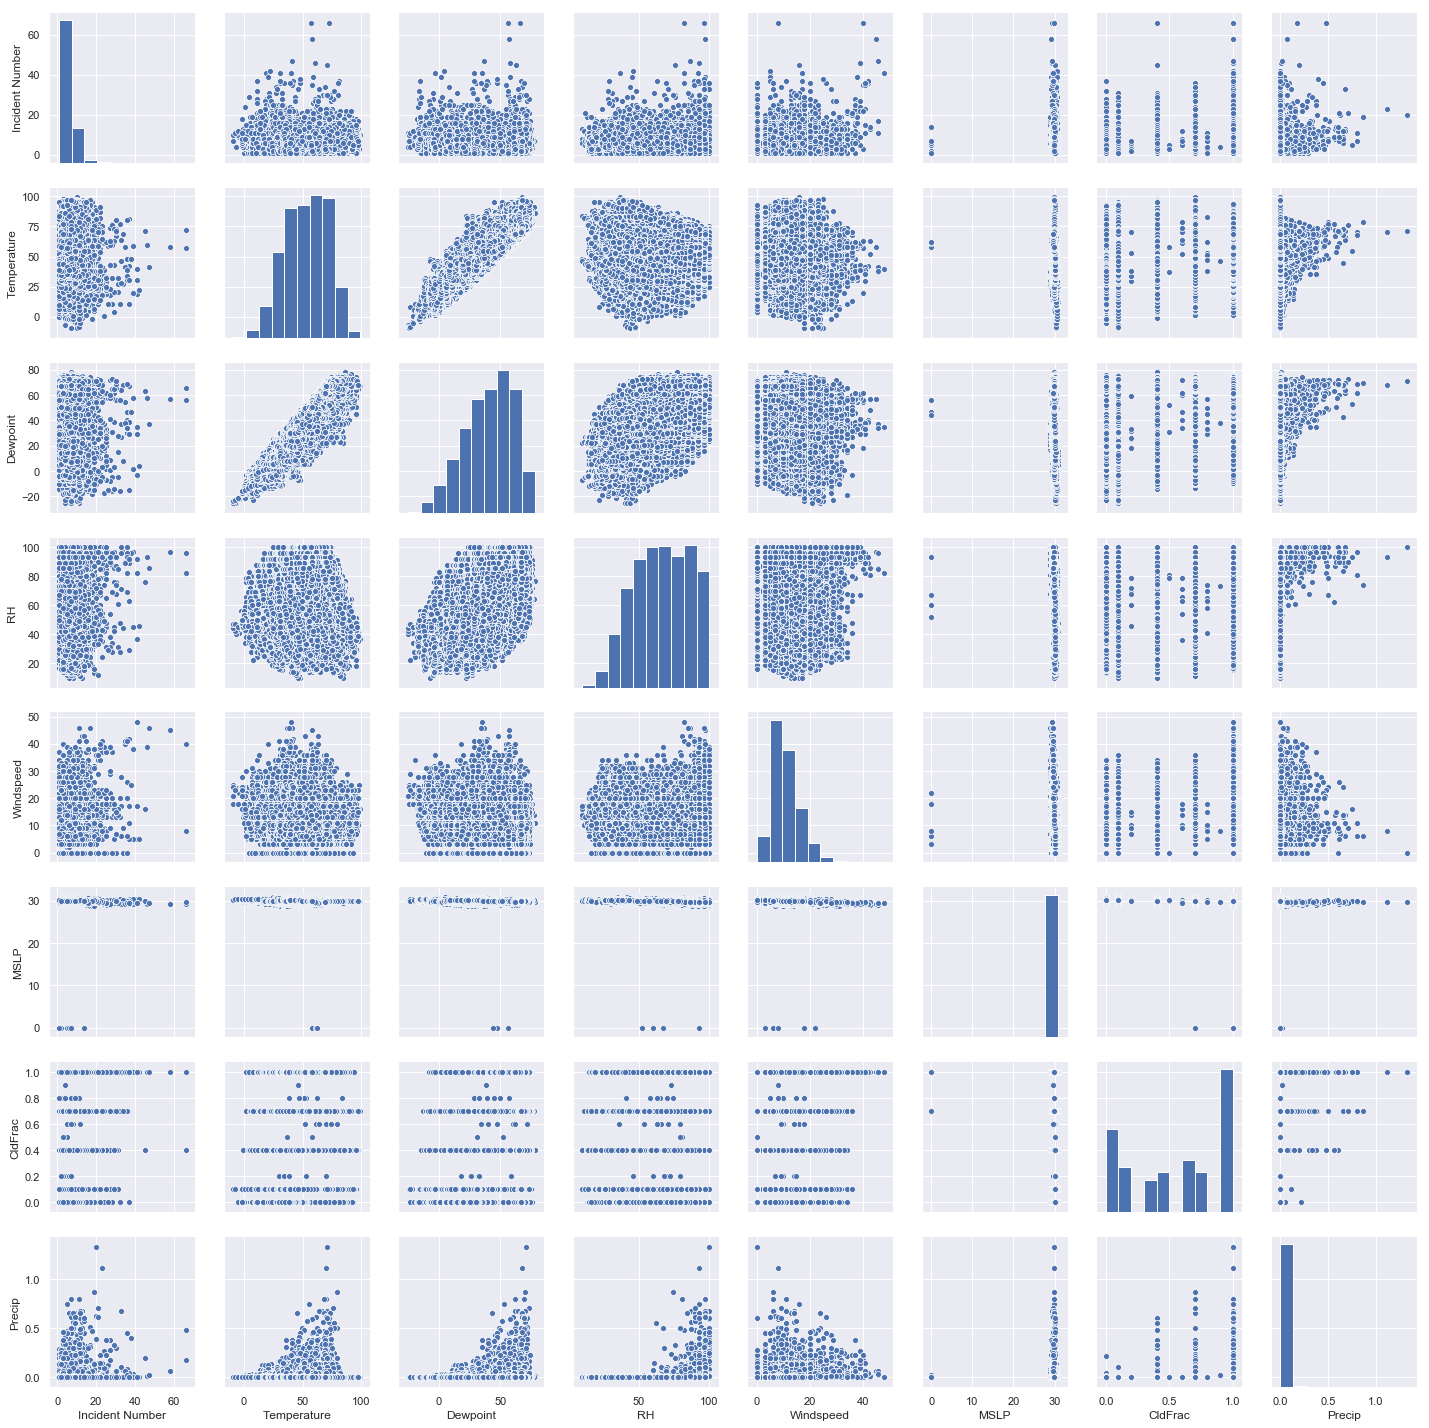

In [28]:
# plot weather factors and incident reorting
df1 = df.groupby(['Time'], as_index=False).agg({'Incident Number':'count', 'Temperature':'mean', 
                                                'Dewpoint':'mean', 'RH':'mean', 'Windspeed':'mean', 
                                                'MSLP':'mean', 'CldFrac':'mean', 'Precip':'mean'})
sns.pairplot(df1)
plt.show()

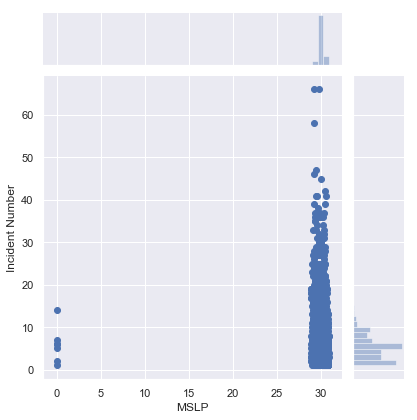

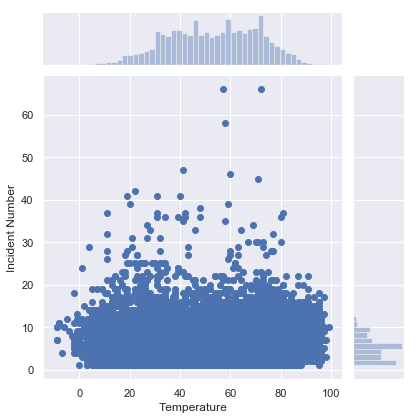

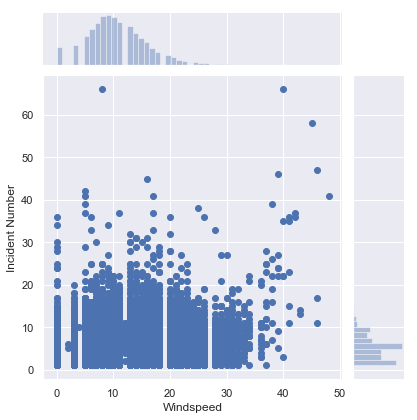

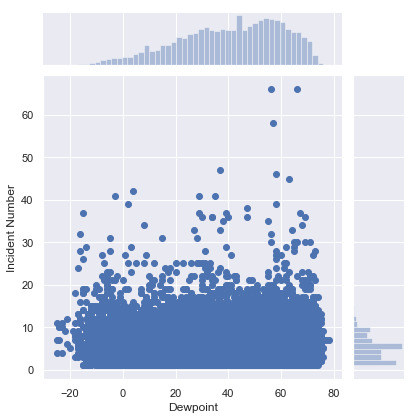

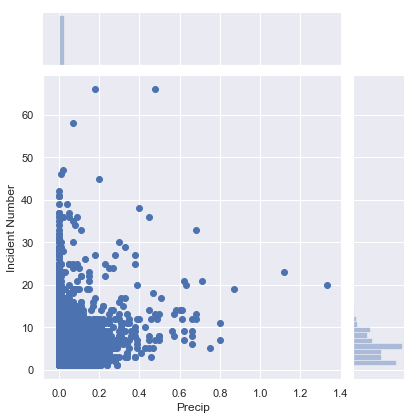

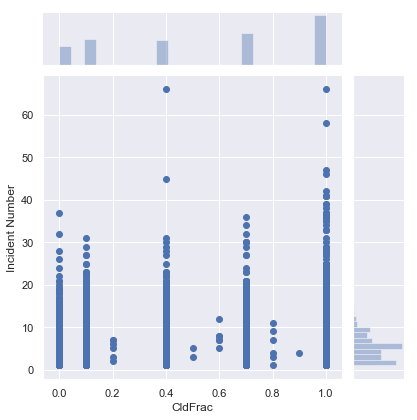

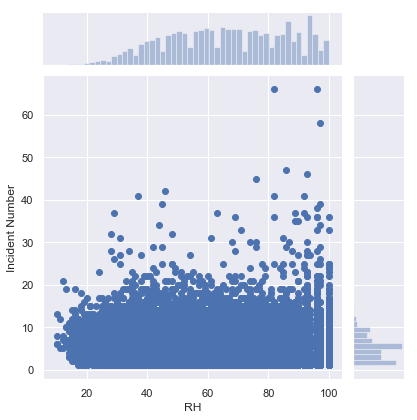

In [29]:
# plot more details
col = list(set(df1.columns) - set(['Time', 'Incident Number']))
for n in col:
    sns.jointplot(y='Incident Number', x=n, data=df1)
#plt.title('Correlation between Temperature and Incident Number', fontsize=30)
    #plt.xlabel(n, fontsize=16)
    #plt.ylabel('Incident Amount')
plt.show()

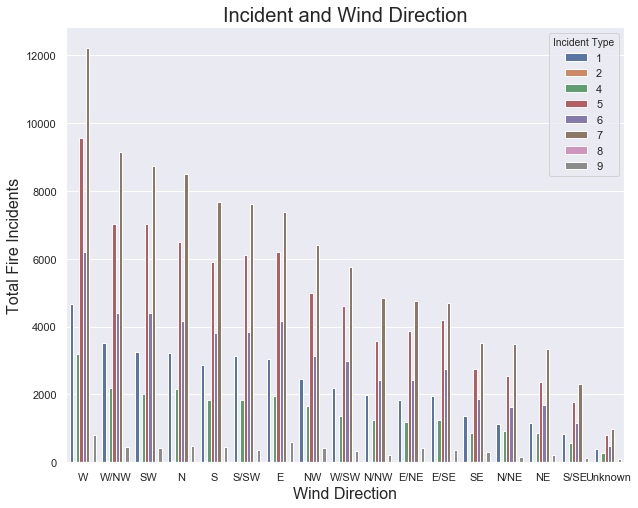

In [30]:
# Incident and Wind direction
df1 = df.groupby(['Incident Type', 'WindDir'], as_index=False)['Incident Number'].count().\
    sort_values('Incident Number', ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x='WindDir', y='Incident Number', hue='Incident Type', data=df1)
plt.title('Incident and Wind Direction', fontsize=20)
plt.xlabel('Wind Direction', fontsize=16)
plt.ylabel('Total Fire Incidents', fontsize=16)
#plt.legend(bbox_to_anchor=(1, 1), borderaxespad=0., labels=labels)
plt.show()

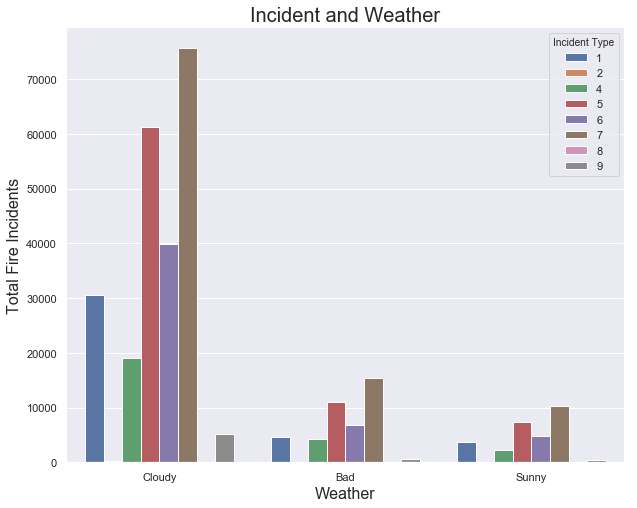

In [31]:
# plot Incident and weather condition
df1 = df.groupby(['Weather', 'Incident Type'], as_index=False)['Incident Number'].count().\
      sort_values('Incident Number', ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x='Weather', y='Incident Number', hue='Incident Type', data=df1)
plt.title('Incident and Weather', fontsize=20)
plt.xlabel('Weather', fontsize=16)
plt.ylabel('Total Fire Incidents', fontsize=16)
#plt.legend(bbox_to_anchor=(1, 1), borderaxespad=0., labels=labels)
plt.show()